### Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.regressor import ResidualsPlot
%matplotlib inline

### Research Question 

How accurately can salary be predicted based on the features in this dataset? What are the best predictors of salary? 

### Literature review

There has been other research attempting to predict salary. In one example, the salary of cross sectional heathcare workers was used in an econometric model (https://link.springer.com/article/10.1186/s12962-018-0093-z). Similar to our study, there is a lack of availability of internationally comparable data. The data in the healthcare study was taken from the international Labour Organization (ILO) yearly earnings data. In our study, earnings were manually reported by each individual and subsequently include non-conventional sources of income, such as bonuses, in addition to the base salary. This may offer more insights into the actual earnings of the population. The healthcare study also pooled their dataset into 4 levels, which was impossible for this study, given the diversity of jobs and industries. Similarly to the healthcare study, this analysis will look at Ordinary Least Squares Regression, Generalized Linear Model, dummy coding, and measuring the regressions using MSE and R2.

### Load and Explore Dataset

While this dataset originally came from an online survey at askamanager.org (https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html), it was cleaned in the "Data cleaning" file to create more encompassing categorical bins, and remove unnecessary and repetitive information and columns. 

In [2]:
df = pd.read_csv('Salary.csv')

In [3]:
df

,Salary (USD),Job title,Industry,Country,Race,Age,Gender_Bin,Highest level of education completed,Experience
0,55000.0,Research and Instruction Librarian,education,USA,White,25-34,Woman,Master's degree,5
1,77416.1,Change & Internal Communications Manager,tech,UK,White,25-34,Other,College degree,8
2,34000.0,Marketing Specialist,finance,USA,White,25-34,Woman,College degree,2
3,65000.0,Program Manager,nonprofit,USA,White,25-34,Woman,College degree,8
4,67000.0,Accounting Manager,finance,USA,White,25-34,Woman,College degree,8
...,...,...,...,...,...,...,...,...,...
26498,80000.0,Systems engineer,manufacturing,USA,"Asian or Asian American, White",25-34,Man,Master's degree,8
26499,159500.0,Senior Project Manager,property,USA,Asian or Asian American,45-54,Woman,College degree,11
26500,73700.0,Underwriter,business,USA,White,25-34,Woman,Master's degree,11
26501,332000.0,Vice Presidenti and Corporate Counsel,finance,USA,White,25-34,Woman,"Professional degree (MD, JD, etc.)",11


In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Cleaned Salary Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (/Users/ajoseph/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/generic.py)

In [5]:
df.dtypes

Salary (USD)                            float64
Job title                                object
Industry                                 object
Country                                  object
Race                                     object
Age                                      object
Gender_Bin                               object
Highest level of education completed     object
Experience                                int64
dtype: object

In [6]:
df.nunique()

Salary (USD)                             5379
Job title                               13634
Industry                                   26
Country                                    53
Race                                       48
Age                                         7
Gender_Bin                                  3
Highest level of education completed        6
Experience                                  8
dtype: int64

In [8]:
df.isna().sum()

Salary (USD)                            0
Job title                               0
Industry                                0
Country                                 0
Race                                    0
Age                                     0
Gender_Bin                              0
Highest level of education completed    0
Experience                              0
dtype: int64

In [9]:
len(df)

26503

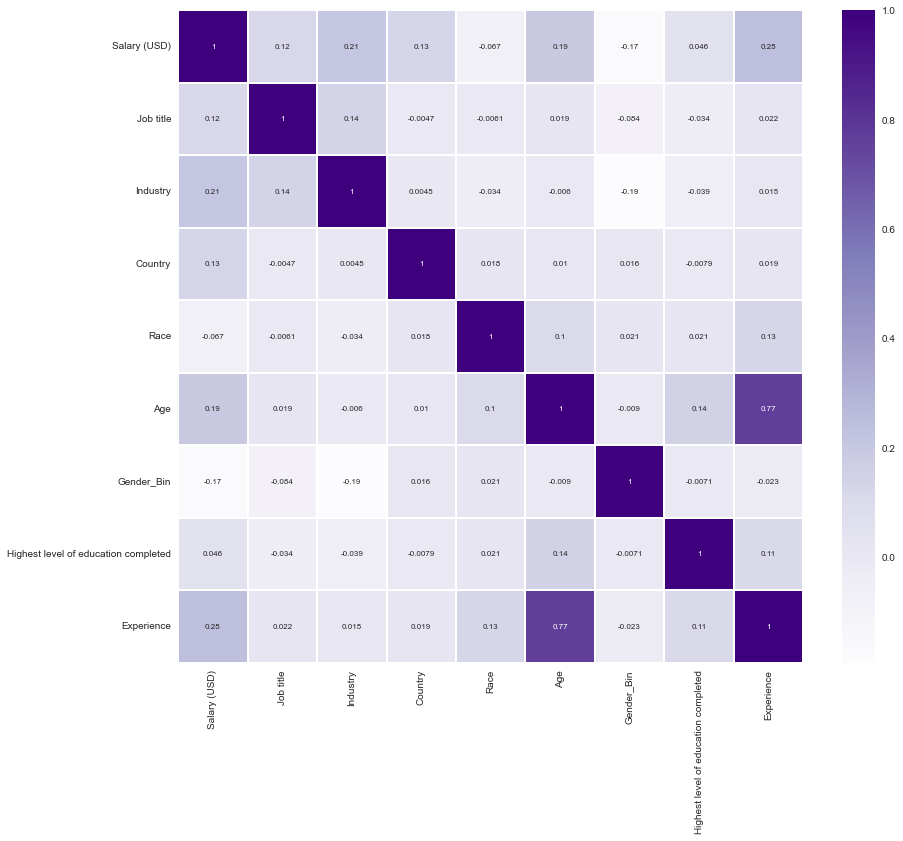

In [10]:
data = df.copy()

labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);

In [11]:
df[['Salary (USD)', 'Age']].groupby(['Age'], as_index=False).mean().sort_values(by='Salary (USD)', ascending=False)

,Age,Salary (USD)
4,55-64,112025.899575
3,45-54,109787.732151
2,35-44,108205.075968
5,65 or over,101260.218333
1,25-34,96109.826824
6,under 18,71352.674000
0,18-24,63452.831446


In [12]:
df[['Salary (USD)', 'Industry']].groupby(['Industry'], as_index=False).mean().sort_values(by='Salary (USD)', ascending=False)

,Industry,Salary (USD)
16,property,204122.693709
22,tech,143862.552017
24,"tech,science",130500.000000
6,environment,108770.698667
8,finance,104822.937870
5,entertainment,104464.575458
19,science,104285.494970
2,"business,manufacturing",102209.353182
14,manufacturing,102055.399163
12,healthcare,96863.962729


In [13]:
df[['Salary (USD)', 'Experience']].groupby(['Experience'], as_index=False).mean().sort_values(by='Salary (USD)', ascending=False)

,Experience,Salary (USD)
5,21,115779.585848
3,8,112956.701742
6,31,112763.383912
4,11,107100.494015
7,41,103800.238175
2,5,83676.515830
1,2,72022.630293
0,0,68488.095972


In [16]:
# Creates ordinal encoding for specific columns based on defined categories
data2 = df.drop(columns=['Salary (USD)', 'Job title'])
cols_to_encode = ['Industry', 'Country', 'Race', 'Gender_Bin']
ordinalencoder=OrdinalEncoder()
data2[cols_to_encode] = ordinalencoder.fit_transform(data2[cols_to_encode])
data2[cols_to_encode] = data2[cols_to_encode].astype('category')

data2.Age = data2.Age.map({'25-34':2,
                          'under 18':0,
                          '35-44':3,
                          '18-24':1,
                          '45-54':4,
                          '55-64':5,
                          '65 or over':6})
data2['Age'] = data2['Age'].astype('category')

data2['Highest level of education completed'] = data2['Highest level of education completed'].map({'College degree':2,
                          'High School':0,
                          "Master's degree":3,
                          'Some college':1,
                          'PhD':4,
                          'Professional degree (MD, JD, etc.)':4})
data2['Highest level of education completed'] = data2['Highest level of education completed'].astype('category')

data2


,Industry,Country,Race,Age,Gender_Bin,Highest level of education completed,Experience
0,3.0,51.0,46.0,2,2.0,3,5
1,22.0,50.0,46.0,2,1.0,2,8
2,8.0,51.0,46.0,2,2.0,2,2
3,15.0,51.0,46.0,2,2.0,2,8
4,8.0,51.0,46.0,2,2.0,2,8
...,...,...,...,...,...,...,...
26498,14.0,51.0,16.0,2,0.0,3,8
26499,16.0,51.0,1.0,4,2.0,2,11
26500,1.0,51.0,46.0,2,2.0,3,11
26501,8.0,51.0,46.0,2,2.0,4,11



MAE: 918.9754273576877
MSE: 1275074.5557180527
RMSE: 1129.1919924078688

training set MAE: 896.1018492340182
training set MSE: 1217029.1140716292
training set RMSE: 1103.1904251178169


/Users/ajoseph/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.36648766, 0.15666014, 0.02861837, 0.0313683 , 0.04580384,
       0.18454873, 0.18651297])

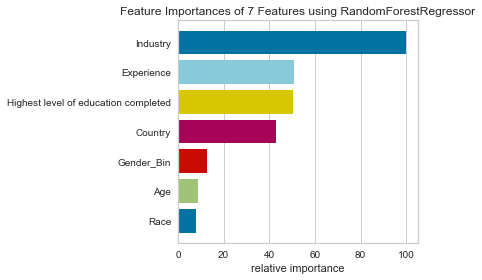

In [18]:
X = data2
y = data['Salary (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


clr = RandomForestRegressor(n_estimators=30, max_depth=8,random_state=0)
clr.fit(X_train,y_train)
y_pred_forest = clr.predict(X_test)
y_trainpred_forest = clr.predict(X_train)


#MAE
MAE1 = metrics.mean_absolute_error(y_test,y_pred_forest)
print('\nMAE:',MAE1)
#MSE
MSE1 = metrics.mean_squared_error(y_test,y_pred_forest)
print('MSE:',MSE1)
#RMSE
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test,y_pred_forest))
print('RMSE:',RMSE1)


#MAE
MAE1 = metrics.mean_absolute_error(y_train,y_trainpred_forest)
print('\ntraining set MAE:',MAE1)
#MSE
MSE1 = metrics.mean_squared_error(y_train,y_trainpred_forest)
print('training set MSE:',MSE1)
#RMSE
RMSE1 = np.sqrt(metrics.mean_squared_error(y_train,y_trainpred_forest))
print('training set RMSE:',RMSE1)


FeatureImportances(clr).fit(X_train,y_train).finalize()

clr.feature_importances_

/Users/ajoseph/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


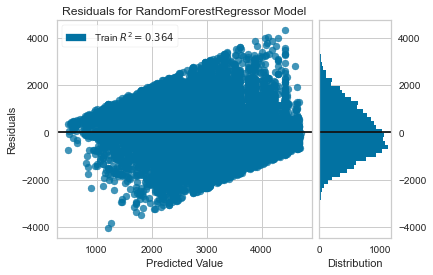

In [19]:
ResidualsPlot(clr, hist=True, qqplot=False).fit(X_train, y_train).finalize()